In [1]:
# Install OpenCV

!apt-get update && apt-get install -y python3-opencv
!pip install opencv-python==4.5.1.48

Unpacking libatspi2.0-0:amd64 (2.30.0-7) ...
Selecting previously unselected package libxtst6:amd64.
Preparing to unpack .../009-libxtst6_2%3a1.2.3-1_amd64.deb ...
Unpacking libxtst6:amd64 (2:1.2.3-1) ...
Selecting previously unselected package at-spi2-core.
Preparing to unpack .../010-at-spi2-core_2.30.0-7_amd64.deb ...
Unpacking at-spi2-core (2.30.0-7) ...
Selecting previously unselected package libsigsegv2:amd64.
Preparing to unpack .../011-libsigsegv2_2.12-2_amd64.deb ...
Unpacking libsigsegv2:amd64 (2.12-2) ...
Selecting previously unselected package m4.
Preparing to unpack .../012-m4_1.4.18-2_amd64.deb ...
Unpacking m4 (1.4.18-2) ...
Selecting previously unselected package autoconf.
Preparing to unpack .../013-autoconf_2.69-11_all.deb ...
Unpacking autoconf (2.69-11) ...
Selecting previously unselected package autotools-dev.
Preparing to unpack .../014-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...
Selecting previously unselected package automake.
P

In [2]:
# setting up notebook modules
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.ticker as mtick
plt.style.use('seaborn')
import numpy as np
import pandas as pd
import cv2


saveFig = True

In [3]:
# First install OpenCV which is needed for viewport tests later.
!apt-get update && apt-get install -y python3-opencv
!pip install opencv-python==4.5.1.48

Hit:1 http://security.debian.org/debian-security buster/updates InRelease
Hit:2 http://deb.debian.org/debian buster InRelease
Hit:3 http://deb.debian.org/debian buster-updates InRelease




python3-opencv is already the newest version (3.2.0+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.


### Geo Complexity: NaiCSG
First, we start with the time tests where we try to understand the performance of each operation using different viewport ranges for BinCSG. 

In [4]:
# Naive Union
# Read the files
naive_union_lvp = pd.read_csv('time_tests/naive/naive_union_lvp.txt')
naive_union_mvp = pd.read_csv('time_tests/naive/naive_union_mvp.txt')
naive_union_hvp = pd.read_csv('time_tests/naive/naive_union_hvp.txt')

# Drop the triangle number in 2 of the DF's - inplace allows to change the DF without reassigning
naive_union_mvp.drop(naive_union_mvp.columns[0], axis=1, inplace=True)
naive_union_hvp.drop(naive_union_hvp.columns[0], axis=1, inplace=True)

# Concatenate the data and add headers
df_naive_union = pd.concat([naive_union_lvp, naive_union_mvp, naive_union_hvp], axis=1)
df_naive_union.columns = ["Triangle Number", "Union LVP", "Union MVP", "Union HVP"]

In [5]:
df_naive_union

,Triangle Number,Union LVP,Union MVP,Union HVP
0,56,8956,9062,9450
1,96,14138,14600,14849
2,108,15553,16151,16542
3,160,22289,23203,23503
4,176,23804,25352,25645
5,240,32644,34164,34283
6,260,35003,36679,36891
7,336,45046,46840,47526
8,360,48132,50193,50188
9,448,59870,62567,62197


In [6]:
# Naive Difference
# Read the files
naive_difference_lvp = pd.read_csv('time_tests/naive/naive_difference_lvp.txt')
naive_difference_mvp = pd.read_csv('time_tests/naive/naive_difference_mvp.txt')
naive_difference_hvp = pd.read_csv('time_tests/naive/naive_difference_hvp.txt')

# Drop the triangle number in 2 of the DF's - inplace allows to change the DF without reassigning
naive_difference_mvp.drop(naive_difference_mvp.columns[0], axis=1, inplace=True)
naive_difference_hvp.drop(naive_difference_hvp.columns[0], axis=1, inplace=True)

# Concatenate the data and add headers
df_naive_difference = pd.concat([naive_difference_lvp, naive_difference_mvp, naive_difference_hvp], axis=1)
df_naive_difference.columns = ["Triangle Number", "Difference LVP", "Difference MVP", "Difference HVP"]

In [7]:
df_naive_difference

,Triangle Number,Difference LVP,Difference MVP,Difference HVP
0,56,8628,9238,9876
1,96,14241,14914,15563
2,108,15653,16714,17482
3,160,22803,23826,24957
4,176,24909,25901,26886
5,240,33702,35009,36127
6,260,37068,37604,38847
7,336,46689,48074,49579
8,360,49754,51359,53224
9,448,61937,63456,64852


In [8]:
# Naive Intersection
# Read the files
naive_intersection_lvp = pd.read_csv('time_tests/naive/naive_intersection_lvp.txt')
naive_intersection_mvp = pd.read_csv('time_tests/naive/naive_intersection_mvp.txt')
naive_intersection_hvp = pd.read_csv('time_tests/naive/naive_intersection_hvp.txt')

# Drop the triangle number in 2 of the DF's - inplace allows to change the DF without reassigning
naive_intersection_mvp.drop(naive_intersection_mvp.columns[0], axis=1, inplace=True)
naive_intersection_hvp.drop(naive_intersection_hvp.columns[0], axis=1, inplace=True)

# Concatenate the data and add headers
df_naive_intersection = pd.concat([naive_intersection_lvp, naive_intersection_mvp, naive_intersection_hvp], axis=1)
df_naive_intersection.columns = ["Triangle Number", "Intersection LVP", "Intersection MVP", "Intersection HVP"]

In [9]:
df_naive_intersection

,Triangle Number,Intersection LVP,Intersection MVP,Intersection HVP
0,56,8812,9222,9252
1,96,14383,14931,14673
2,108,15923,16500,16205
3,160,23398,23712,23129
4,176,25388,25931,25203
5,240,34254,34838,33748
6,260,37113,37667,37258
7,336,47323,48101,46226
8,360,50639,51381,49612
9,448,63019,63366,61049


In [10]:
# Get mean times for each operations and concatenate everything into a master data frame for naive_csg
naive_csg = pd.concat([df_naive_union, df_naive_difference.drop(df_naive_difference.columns[0], axis=1), df_naive_intersection.drop(df_naive_intersection.columns[0], axis=1)], axis=1)
naive_csg['LVP Mean Time'] = naive_csg[['Union LVP', 'Difference LVP', 'Intersection LVP']].mean(axis=1)
naive_csg['MVP Mean Time'] = naive_csg[['Union MVP', 'Difference MVP', 'Intersection MVP']].mean(axis=1)
naive_csg['HVP Mean Time'] = naive_csg[['Union HVP', 'Difference HVP', 'Intersection HVP']].mean(axis=1)

In [11]:
# todo: add view port fill per step per operation
naive_csg

,Triangle Number,Union LVP,Union MVP,Union HVP,Difference LVP,Difference MVP,Difference HVP,Intersection LVP,Intersection MVP,Intersection HVP,LVP Mean Time,MVP Mean Time,HVP Mean Time
0,56,8956,9062,9450,8628,9238,9876,8812,9222,9252,8798.666667,9174.000000,9526.000000
1,96,14138,14600,14849,14241,14914,15563,14383,14931,14673,14254.000000,14815.000000,15028.333333
2,108,15553,16151,16542,15653,16714,17482,15923,16500,16205,15709.666667,16455.000000,16743.000000
3,160,22289,23203,23503,22803,23826,24957,23398,23712,23129,22830.000000,23580.333333,23863.000000
4,176,23804,25352,25645,24909,25901,26886,25388,25931,25203,24700.333333,25728.000000,25911.333333
5,240,32644,34164,34283,33702,35009,36127,34254,34838,33748,33533.333333,34670.333333,34719.333333
6,260,35003,36679,36891,37068,37604,38847,37113,37667,37258,36394.666667,37316.666667,37665.333333
7,336,45046,46840,47526,46689,48074,49579,47323,48101,46226,46352.666667,47671.666667,47777.000000
8,360,48132,50193,50188,49754,51359,53224,50639,51381,49612,49508.333333,50977.666667,51008.000000
9,448,59870,62567,62197,61937,63456,64852,63019,63366,61049,61608.666667,63129.666667,62699.333333


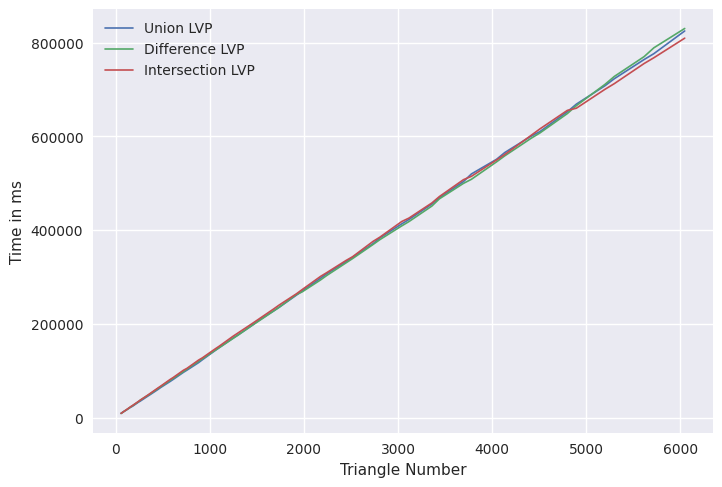

In [12]:
# Plot each of the operations for LVP:
ax = naive_csg.plot(x ='Triangle Number', y=['Union LVP', 'Difference LVP', 'Intersection LVP'], kind = 'line', lw=1.2)
ax.set_ylabel("Time in ms")
if saveFig:
    plt.savefig('plots/naive_csg_lvp.png')
plt.show()

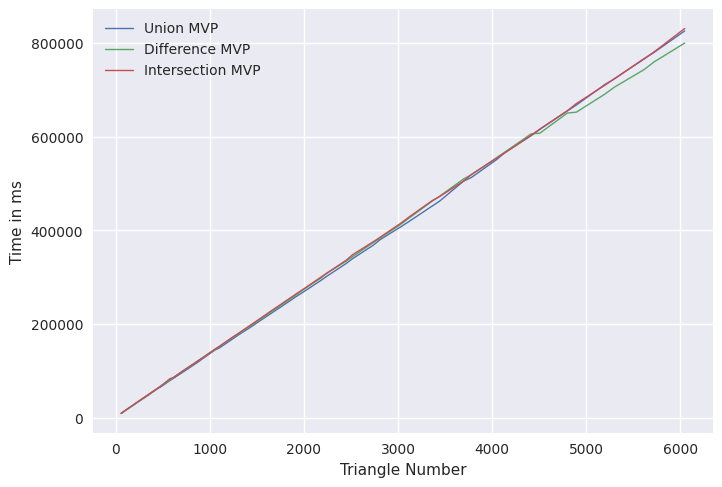

In [13]:
# Plot each of the operations for MVP:
ax = naive_csg.plot(x ='Triangle Number', y=['Union MVP', 'Difference MVP', 'Intersection MVP'], kind = 'line', lw=1)
ax.set_ylabel("Time in ms")
if saveFig:
    plt.savefig('plots/naive_csg_mvp.png')
plt.show()

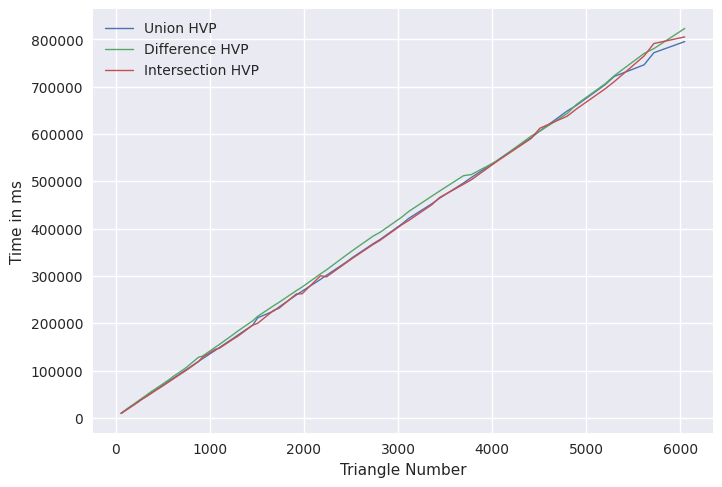

In [14]:
# Plot each of the operations for HVP:
ax = naive_csg.plot(x ='Triangle Number', y=['Union HVP', 'Difference HVP', 'Intersection HVP'], kind = 'line', lw=1)
ax.set_ylabel("Time in ms")
if saveFig:
    plt.savefig('plots/naive_csg_hvp.png')
plt.show()

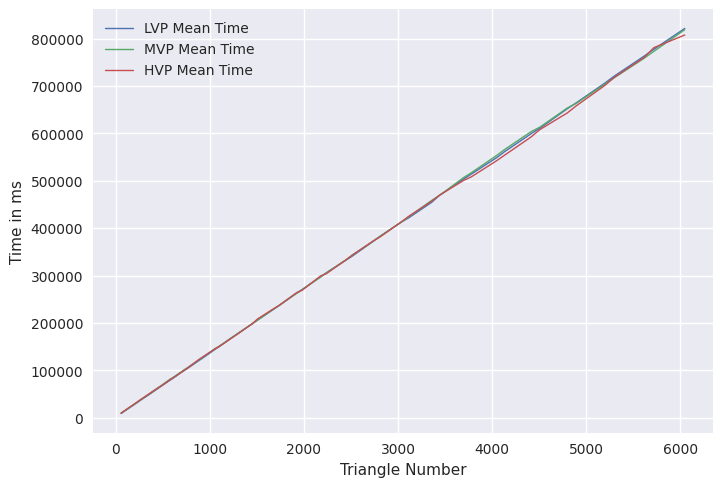

In [15]:
# Plot the mean time of each view port fill:
ax = naive_csg.plot(x ='Triangle Number', y=['LVP Mean Time', 'MVP Mean Time', 'HVP Mean Time'], kind = 'line', lw=1)
ax.set_ylabel("Time in ms")
if saveFig:
    plt.savefig('plots/naive_csg_mean.png')
plt.show()

### Geo Complexity: BinCSG
First, we start with the time tests where we try to understand the performance of each operation using different viewport ranges for BinCSG. 

In [16]:
# Bin Union
# Read the files
bin_union_lvp = pd.read_csv('time_tests/bin/bin_union_lvp.txt')
bin_union_mvp = pd.read_csv('time_tests/bin/bin_union_mvp.txt')
bin_union_hvp = pd.read_csv('time_tests/bin/bin_union_hvp.txt')

# Drop the triangle number in 2 of the DF's - inplace allows to change the DF without reassigning
bin_union_mvp.drop(bin_union_mvp.columns[0], axis=1, inplace=True)
bin_union_hvp.drop(bin_union_hvp.columns[0], axis=1, inplace=True)

# Concatenate the data and add headers
df_bin_union = pd.concat([bin_union_lvp, bin_union_mvp, bin_union_hvp], axis=1)
df_bin_union.columns = ["Triangle Number", "Union LVP", "Union MVP", "Union HVP"]

In [17]:
df_bin_union

,Triangle Number,Union LVP,Union MVP,Union HVP
0,56,2043,3962,4094
1,96,3725,6124,6282
2,108,4427,6863,6871
3,160,5983,9817,9684
4,176,6371,11020,10821
5,240,8913,14450,14350
6,260,9789,15221,15250
7,336,11904,19276,19476
8,360,12996,20558,20630
9,448,16515,25312,24822


In [18]:
# Bin Intersection
# Read the files
bin_intersection_lvp = pd.read_csv('time_tests/bin/bin_intersection_lvp.txt')
bin_intersection_mvp = pd.read_csv('time_tests/bin/bin_intersection_mvp.txt')
bin_intersection_hvp = pd.read_csv('time_tests/bin/bin_intersection_hvp.txt')

# Drop the triangle number in 2 of the DF's - inplace allows to change the DF without reassigning
bin_intersection_mvp.drop(bin_intersection_mvp.columns[0], axis=1, inplace=True)
bin_intersection_hvp.drop(bin_intersection_hvp.columns[0], axis=1, inplace=True)

# Concatenate the data and add headers
df_bin_intersection = pd.concat([bin_intersection_lvp, bin_intersection_mvp, bin_intersection_hvp], axis=1)
df_bin_intersection.columns = ["Triangle Number", "Intersection LVP", "Intersection MVP", "Intersection HVP"]

In [19]:
df_bin_intersection

,Triangle Number,Intersection LVP,Intersection MVP,Intersection HVP
0,56,2500,4729,6716
1,96,4494,8408,10612
2,108,4749,9249,11895
3,160,6371,12858,17396
4,176,6980,14068,18841
5,240,9824,19930,25532
6,260,10486,21224,26851
7,336,13019,26641,34795
8,360,13905,27850,36923
9,448,17624,35795,44973


In [20]:
# Bin Intersection
# Read the files
bin_difference_lvp = pd.read_csv('time_tests/bin/bin_difference_lvp.txt')
bin_difference_mvp = pd.read_csv('time_tests/bin/bin_difference_mvp.txt')
bin_difference_hvp = pd.read_csv('time_tests/bin/bin_difference_hvp.txt')

# Drop the triangle number in 2 of the DF's - inplace allows to change the DF without reassigning
bin_difference_mvp.drop(bin_difference_mvp.columns[0], axis=1, inplace=True)
bin_difference_hvp.drop(bin_difference_hvp.columns[0], axis=1, inplace=True)

# Concatenate the data and add headers
df_bin_difference = pd.concat([bin_difference_lvp, bin_difference_mvp, bin_difference_hvp], axis=1)
df_bin_difference.columns = ["Triangle Number", "Difference LVP", "Difference MVP", "Difference HVP"]

In [21]:
df_bin_difference

,Triangle Number,Difference LVP,Difference MVP,Difference HVP
0,56,3241,6545,10091
1,96,5629,11464,16521
2,108,6248,12769,18520
3,160,8482,18374,27067
4,176,9285,19526,28710
5,240,12822,26908,39772
6,260,13849,30035,42747
7,336,17817,36510,54887
8,360,18797,40233,58519
9,448,23295,49664,72113


In [22]:
# Get mean times for each operations and concatenate everything into a master data frame for naive_csg
bin_csg = pd.concat([df_bin_union, df_bin_difference.drop(df_bin_difference.columns[0], axis=1), df_bin_intersection.drop(df_bin_intersection.columns[0], axis=1)], axis=1)
bin_csg['LVP Mean Time'] = bin_csg[['Union LVP', 'Difference LVP', 'Intersection LVP']].mean(axis=1)
bin_csg['MVP Mean Time'] = bin_csg[['Union MVP', 'Difference MVP', 'Intersection MVP']].mean(axis=1)
bin_csg['HVP Mean Time'] = bin_csg[['Union HVP', 'Difference HVP', 'Intersection HVP']].mean(axis=1)

In [23]:
bin_csg

,Triangle Number,Union LVP,Union MVP,Union HVP,Difference LVP,Difference MVP,Difference HVP,Intersection LVP,Intersection MVP,Intersection HVP,LVP Mean Time,MVP Mean Time,HVP Mean Time
0,56,2043,3962,4094,3241,6545,10091,2500,4729,6716,2594.666667,5078.666667,6967.000000
1,96,3725,6124,6282,5629,11464,16521,4494,8408,10612,4616.000000,8665.333333,11138.333333
2,108,4427,6863,6871,6248,12769,18520,4749,9249,11895,5141.333333,9627.000000,12428.666667
3,160,5983,9817,9684,8482,18374,27067,6371,12858,17396,6945.333333,13683.000000,18049.000000
4,176,6371,11020,10821,9285,19526,28710,6980,14068,18841,7545.333333,14871.333333,19457.333333
5,240,8913,14450,14350,12822,26908,39772,9824,19930,25532,10519.666667,20429.333333,26551.333333
6,260,9789,15221,15250,13849,30035,42747,10486,21224,26851,11374.666667,22160.000000,28282.666667
7,336,11904,19276,19476,17817,36510,54887,13019,26641,34795,14246.666667,27475.666667,36386.000000
8,360,12996,20558,20630,18797,40233,58519,13905,27850,36923,15232.666667,29547.000000,38690.666667
9,448,16515,25312,24822,23295,49664,72113,17624,35795,44973,19144.666667,36923.666667,47302.666667


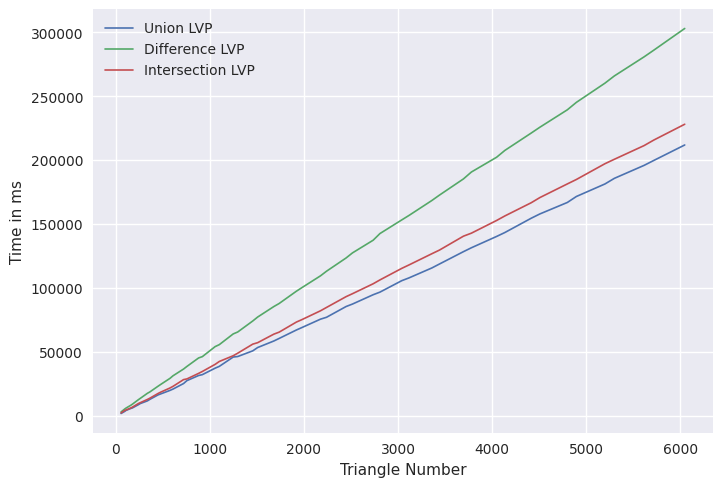

In [24]:
# Plot each of the operations for LVP:
ax = bin_csg.plot(x ='Triangle Number', y=['Union LVP', 'Difference LVP', 'Intersection LVP'], kind = 'line', lw=1.2)
ax.set_ylabel("Time in ms")
if saveFig:
    plt.savefig('plots/bin_csg_lvp.png')
plt.show()

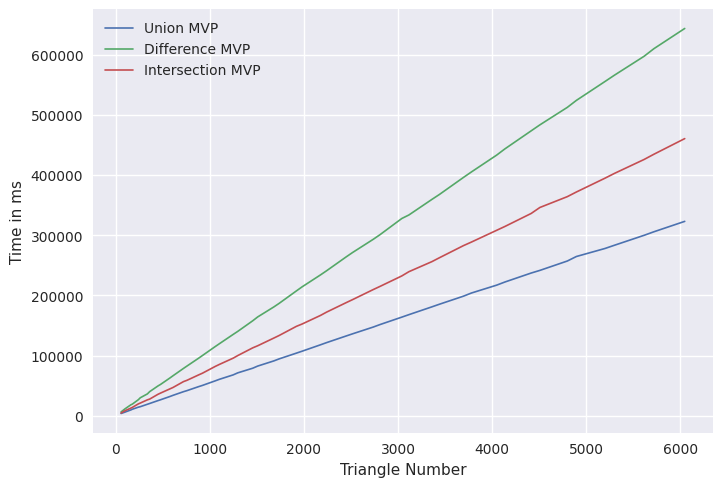

In [25]:
# Plot each of the operations for MVP:
ax = bin_csg.plot(x ='Triangle Number', y=['Union MVP', 'Difference MVP', 'Intersection MVP'], kind = 'line', lw=1.2)
ax.set_ylabel("Time in ms")
if saveFig:
    plt.savefig('plots/bin_csg_mvp.png')
plt.show()

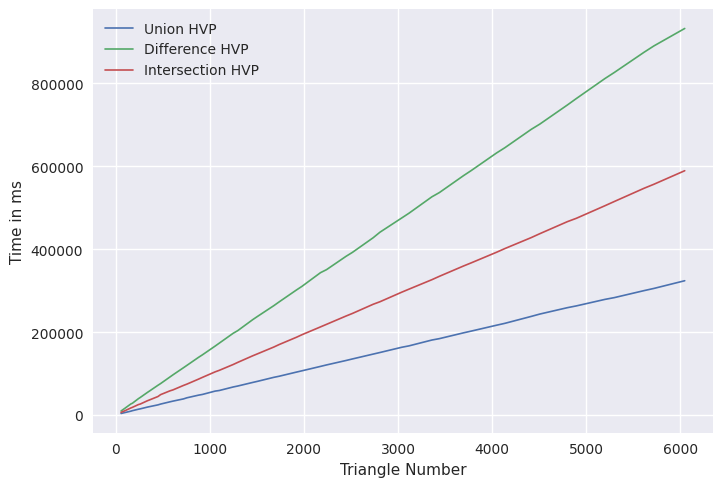

In [26]:
# Plot each of the operations for HVP:
ax = bin_csg.plot(x ='Triangle Number', y=['Union HVP', 'Difference HVP', 'Intersection HVP'], kind = 'line', lw=1.2)
ax.set_ylabel("Time in ms")
if saveFig:
    plt.savefig('plots/bin_csg_hvp.png')
plt.show()

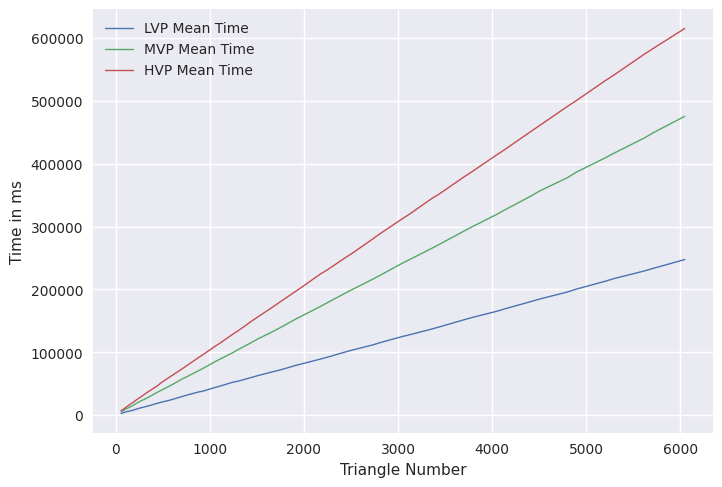

In [27]:
# Plot the mean time of each view port fill:
ax = bin_csg.plot(x ='Triangle Number', y=['LVP Mean Time', 'MVP Mean Time', 'HVP Mean Time'], kind = 'line', lw=1)
ax.set_ylabel("Time in ms")
if saveFig:
    plt.savefig('plots/bin_csg_mean.png')
plt.show()

### Geo Complexity: OptiCSG
First, we start with the time tests where we try to understand the performance of each operation using different viewport ranges for BinCSG. 

In [28]:
# Optim Union
# Read the files
optim_union_lvp = pd.read_csv('time_tests/optim/optim_union_lvp.txt')
optim_union_mvp = pd.read_csv('time_tests/optim/optim_union_mvp.txt')
optim_union_hvp = pd.read_csv('time_tests/optim/optim_union_hvp.txt')

# Drop the triangle number in 2 of the DF's - inplace allows to change the DF without reassigning
optim_union_mvp.drop(optim_union_mvp.columns[0], axis=1, inplace=True)
optim_union_hvp.drop(optim_union_hvp.columns[0], axis=1, inplace=True)

# Concatenate the data and add headers
df_optim_union = pd.concat([optim_union_lvp, optim_union_mvp, optim_union_hvp], axis=1)
df_optim_union.columns = ["Triangle Number", "Union LVP", "Union MVP", "Union HVP"]

In [29]:
df_optim_union

,Triangle Number,Union LVP,Union MVP,Union HVP
0,56,1710,3920,4351
1,96,2168,4571,4342
2,108,2197,4794,4217
3,160,2496,5489,4154
4,176,2358,5025,4019
...,...,...,...,...
295,181200,4926,9470,8460
296,181800,4636,8880,8333
297,183616,4677,8767,8365
298,184220,4631,8865,8408


In [30]:
# Optim Intersection
# Read the files
optim_intersection_lvp = pd.read_csv('time_tests/optim/optim_intersection_lvp.txt')
optim_intersection_mvp = pd.read_csv('time_tests/optim/optim_intersection_mvp.txt')
optim_intersection_hvp = pd.read_csv('time_tests/optim/optim_intersection_hvp.txt')

# Drop the triangle number in 2 of the DF's - inplace allows to change the DF without reassigning
optim_intersection_mvp.drop(optim_intersection_mvp.columns[0], axis=1, inplace=True)
optim_intersection_hvp.drop(optim_intersection_hvp.columns[0], axis=1, inplace=True)

# Concatenate the data and add headers
df_optim_intersection = pd.concat([optim_intersection_lvp, optim_intersection_mvp, optim_intersection_hvp], axis=1)
df_optim_intersection.columns = ["Triangle Number", "Intersection LVP", "Intersection MVP", "Intersection HVP"]

In [31]:
df_optim_intersection

,Triangle Number,Intersection LVP,Intersection MVP,Intersection HVP
0,56,2889,7043,9701
1,96,3829,8379,10891
2,108,3711,8351,10660
3,160,4072,9924,11547
4,176,3593,8497,10459
...,...,...,...,...
295,181200,7945,18139,21124
296,181800,7237,16742,20592
297,183616,7341,16567,20799
298,184220,7305,16679,20695


In [32]:
# Optim Intersection
# Read the files
optim_difference_lvp = pd.read_csv('time_tests/optim/optim_difference_lvp.txt')
optim_difference_mvp = pd.read_csv('time_tests/optim/optim_difference_mvp.txt')
optim_difference_hvp = pd.read_csv('time_tests/optim/optim_difference_hvp.txt')

# Drop the triangle number in 2 of the DF's - inplace allows to change the DF without reassigning
optim_difference_mvp.drop(optim_difference_mvp.columns[0], axis=1, inplace=True)
optim_difference_hvp.drop(optim_difference_hvp.columns[0], axis=1, inplace=True)

# Concatenate the data and add headers
df_optim_difference = pd.concat([optim_difference_lvp, optim_difference_mvp, optim_difference_hvp], axis=1)
df_optim_difference.columns = ["Triangle Number", "Difference LVP", "Difference MVP", "Difference HVP"]

In [33]:
df_optim_difference

,Triangle Number,Difference LVP,Difference MVP,Difference HVP
0,56,4648,11609,18127
1,96,6136,14110,20331
2,108,6139,13478,19366
3,160,6926,16003,21361
4,176,5974,13173,19826
...,...,...,...,...
295,181200,12190,30934,41770
296,181800,11243,28258,40659
297,183616,11310,28226,40804
298,184220,11338,28653,40606


In [34]:
# Get mean times for each operations and concatenate everything into a master data frame for naive_csg
optim_csg = pd.concat([df_optim_union, df_optim_difference.drop(df_optim_difference.columns[0], axis=1), df_optim_intersection.drop(df_optim_intersection.columns[0], axis=1)], axis=1)
optim_csg['LVP Mean Time'] = optim_csg[['Union LVP', 'Difference LVP', 'Intersection LVP']].mean(axis=1)
optim_csg['MVP Mean Time'] = optim_csg[['Union MVP', 'Difference MVP', 'Intersection MVP']].mean(axis=1)
optim_csg['HVP Mean Time'] = optim_csg[['Union HVP', 'Difference HVP', 'Intersection HVP']].mean(axis=1)

In [35]:
optim_csg

,Triangle Number,Union LVP,Union MVP,Union HVP,Difference LVP,Difference MVP,Difference HVP,Intersection LVP,Intersection MVP,Intersection HVP,LVP Mean Time,MVP Mean Time,HVP Mean Time
0,56,1710,3920,4351,4648,11609,18127,2889,7043,9701,3082.333333,7524.000000,10726.333333
1,96,2168,4571,4342,6136,14110,20331,3829,8379,10891,4044.333333,9020.000000,11854.666667
2,108,2197,4794,4217,6139,13478,19366,3711,8351,10660,4015.666667,8874.333333,11414.333333
3,160,2496,5489,4154,6926,16003,21361,4072,9924,11547,4498.000000,10472.000000,12354.000000
4,176,2358,5025,4019,5974,13173,19826,3593,8497,10459,3975.000000,8898.333333,11434.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,181200,4926,9470,8460,12190,30934,41770,7945,18139,21124,8353.666667,19514.333333,23784.666667
296,181800,4636,8880,8333,11243,28258,40659,7237,16742,20592,7705.333333,17960.000000,23194.666667
297,183616,4677,8767,8365,11310,28226,40804,7341,16567,20799,7776.000000,17853.333333,23322.666667
298,184220,4631,8865,8408,11338,28653,40606,7305,16679,20695,7758.000000,18065.666667,23236.333333


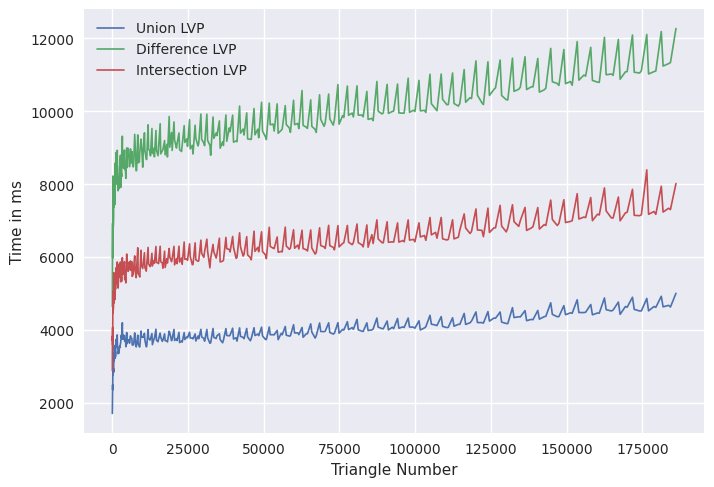

In [36]:
# Plot each of the operations for LVP:
ax = optim_csg.plot(x ='Triangle Number', y=['Union LVP', 'Difference LVP', 'Intersection LVP'], kind = 'line', lw=1.2)
ax.set_ylabel("Time in ms")
if saveFig:
    plt.savefig('plots/optim_csg_lvp.png')
plt.show()

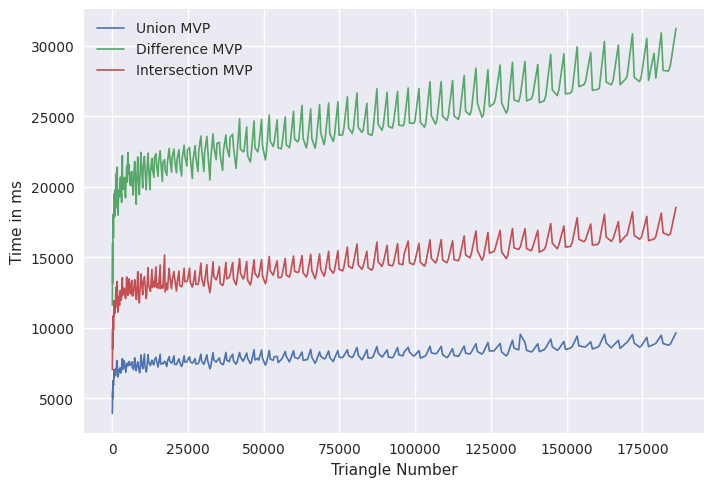

In [37]:
# Plot each of the operations for MVP:
ax = optim_csg.plot(x ='Triangle Number', y=['Union MVP', 'Difference MVP', 'Intersection MVP'], kind = 'line', lw=1.2)
ax.set_ylabel("Time in ms")
if saveFig:
    plt.savefig('plots/optim_csg_mvp.png')
plt.show()

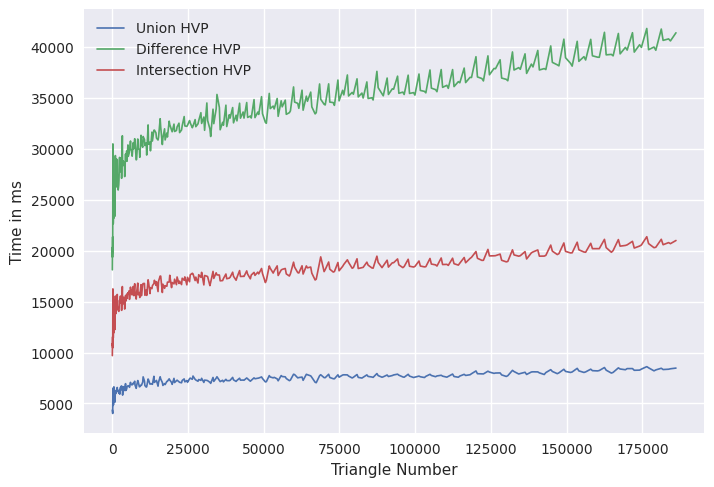

In [38]:
# Plot each of the operations for HVP:
ax = optim_csg.plot(x ='Triangle Number', y=['Union HVP', 'Difference HVP', 'Intersection HVP'], kind = 'line', lw=1.2)
ax.set_ylabel("Time in ms")
if saveFig:
    plt.savefig('plots/optim_csg_hvp.png')
plt.show()

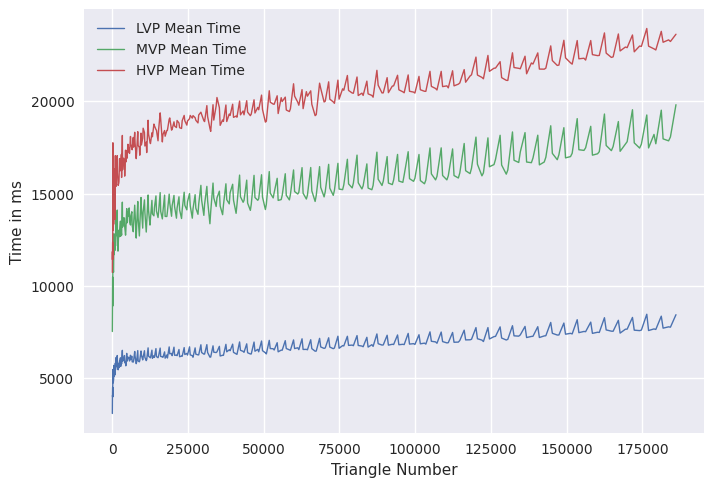

In [39]:
# Plot the mean time of each view port fill:
ax = optim_csg.plot(x ='Triangle Number', y=['LVP Mean Time', 'MVP Mean Time', 'HVP Mean Time'], kind = 'line', lw=1)
ax.set_ylabel("Time in ms")
if saveFig:
    plt.savefig('plots/optim_csg_mean.png')
plt.show()

### Geo Complexity: OptiCSG
First, we start with the time tests where we try to understand the performance of each operation using different viewport ranges for BinCSG. 

#### Compare Geo Complexity Tests
Here we compare the different implementation.

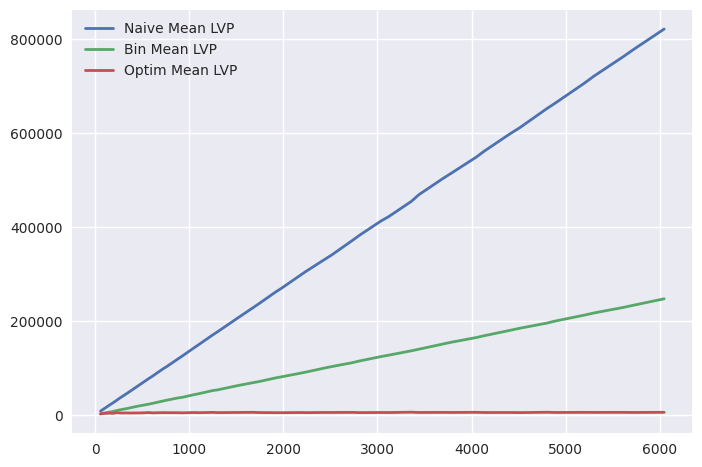

In [40]:
# Low View Port
plt.plot(naive_csg['Triangle Number'], naive_csg['LVP Mean Time'], linewidth=2) 
plt.plot(bin_csg['Triangle Number'], bin_csg['LVP Mean Time'], linewidth=2) 
plt.plot(optim_csg['Triangle Number'].head(50), optim_csg['LVP Mean Time'].head(50), linewidth=2)

plt.legend(['Naive Mean LVP', 'Bin Mean LVP', 'Optim Mean LVP'], loc='upper left')
if saveFig:
    plt.savefig('plots/geo_complexity_lvp.png')
plt.show()

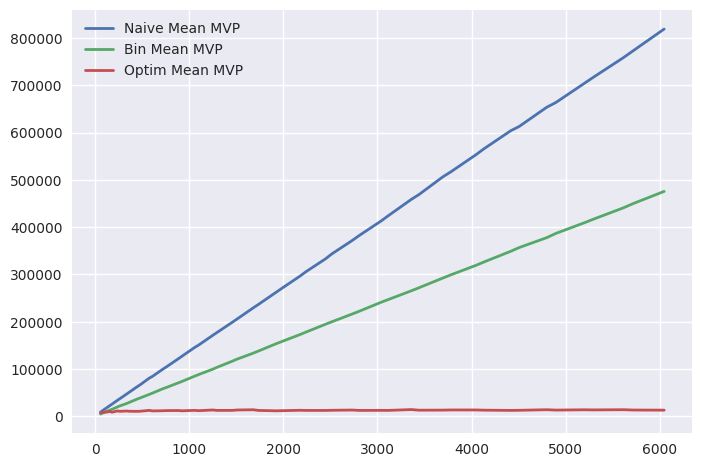

In [41]:
# Medium View Port
plt.plot(naive_csg['Triangle Number'], naive_csg['MVP Mean Time'], linewidth=2)
plt.plot(bin_csg['Triangle Number'], bin_csg['MVP Mean Time'], linewidth=2) 
plt.plot(optim_csg['Triangle Number'].head(50), optim_csg['MVP Mean Time'].head(50), linewidth=2)
plt.legend(['Naive Mean MVP', 'Bin Mean MVP', 'Optim Mean MVP'], loc='upper left')
if saveFig:
    plt.savefig('plots/geo_complexity_mvp.png')
plt.show()

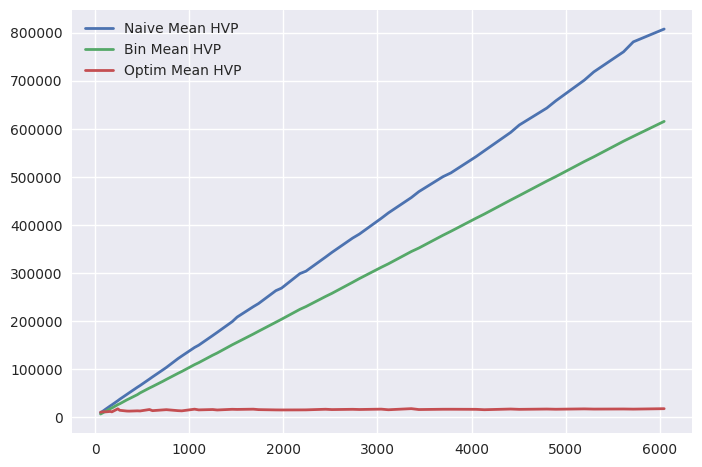

In [42]:
# High View Port
plt.plot(naive_csg['Triangle Number'], naive_csg['HVP Mean Time'], linewidth=2)
plt.plot(bin_csg['Triangle Number'], bin_csg['HVP Mean Time'], linewidth=2) 
plt.plot(optim_csg['Triangle Number'].head(50), optim_csg['HVP Mean Time'].head(50), linewidth=2)
plt.legend(['Naive Mean HVP', 'Bin Mean HVP', 'Optim Mean HVP'], loc='upper left')
if saveFig:
    plt.savefig('plots/geo_complexity_hvp.png')
plt.show()

### View Port Analysis
Here we try to extract the values of the viewport fill rates for each operation and each view port fill rate. We're mostly interested in the mean time. The goal is to get a mean time and then plot some error rate around it.

In [43]:
## First we need a function that can get us the rate directly from an image.
def getRate(img):
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    n_pixels = img.size
    n_white_pix = np.sum(img == 255)
    n_rate = (n_pixels - n_white_pix)/n_pixels * 100
    return n_rate

In [44]:
## We also need a function that goes through all the files in our renders, labels each operation correctly, and finally gets the rate using [getRate] from above.
def generateRates(operation, op_type, start_idx, finish_idx):
    path = "time_tests/renders/"
    n_triangles = optim_csg["Triangle Number"].tolist()
    n_viewPort = []
    for i in range(start_idx, finish_idx, 1):
        n_viewPort.append(getRate(path + "optim_" + operation.lower() + "_" + str(i) + ".png"))
    data_tuples = list(zip(n_triangles, n_viewPort))
    main_df = pd.DataFrame(data_tuples, columns=['Triangle Number','Rate'])
    main_df["Operation"] = operation
    main_df["Type"] = op_type
    return main_df 

In [45]:
# Extract the viewport values for union
viewport_union_lvp = generateRates("Union", "LVP", 0, 50)
viewport_union_mvp = generateRates("Union", "MVP",153, 203)
viewport_union_hvp = generateRates("Union", "HVP" ,306, 356)

view_port_union = pd.concat([viewport_union_lvp.loc[:, 'Triangle Number':'Rate']])
view_port_union.rename(columns={"Rate": "Rate Union LVP"}, inplace=True)
view_port_union["Rate Union MVP"] = viewport_union_mvp["Rate"]
view_port_union["Rate Union HVP"] = viewport_union_hvp["Rate"]

In [46]:
view_port_union

,Triangle Number,Rate Union LVP,Rate Union MVP,Rate Union HVP
0,56,31.656944,64.027300,98.268403
1,96,32.860937,67.471137,99.794314
2,108,35.124306,76.070964,99.993142
3,160,35.302387,76.191059,99.994705
4,176,36.403342,77.233203,99.970052
5,240,36.612066,77.911024,100.000000
6,260,37.234288,79.686111,100.000000
7,336,37.392622,79.743273,100.000000
8,360,38.038238,80.427387,100.000000
9,448,38.075043,80.688932,100.000000


In [47]:
# Extract the viewport values for intersection
viewport_intersection_lvp = generateRates("Intersection", "LVP", 51, 101)
viewport_intersection_mvp = generateRates("Intersection", "MVP", 204, 254)
viewport_intersection_hvp = generateRates("Intersection", "HVP" , 357, 407)

view_port_intersection = pd.concat([viewport_intersection_lvp.loc[:, 'Triangle Number':'Rate']])
view_port_intersection.rename(columns={"Rate": "Rate Intersection LVP"}, inplace=True)
view_port_intersection["Rate Intersection MVP"] = viewport_intersection_mvp["Rate"]
view_port_intersection["Rate Intersection HVP"] = viewport_intersection_hvp["Rate"]

In [48]:
view_port_intersection

,Triangle Number,Rate Intersection LVP,Rate Intersection MVP,Rate Intersection HVP
0,56,16.824262,37.882118,67.487457
1,96,17.183203,38.769661,70.598307
2,108,19.155990,42.142839,72.587326
3,160,19.437804,41.631858,75.919705
4,176,20.327604,45.196615,79.433160
5,240,20.226606,44.773351,79.207335
6,260,20.776389,46.909201,81.557378
7,336,20.927127,46.859505,81.431380
8,360,21.246571,47.457335,82.664497
9,448,21.203516,47.433724,82.175521


In [49]:
# Extract the viewport values for difference
viewport_difference_lvp = generateRates("Difference", "LVP", 102, 152)
viewport_difference_mvp = generateRates("Difference", "MVP", 255, 305)
viewport_difference_hvp = generateRates("Difference", "HVP" ,408, 458)

view_port_difference = pd.concat([viewport_difference_lvp.loc[:, 'Triangle Number':'Rate']])
view_port_difference.rename(columns={"Rate": "Rate Difference LVP"}, inplace=True)
view_port_difference["Rate Difference MVP"] = viewport_difference_mvp["Rate"]
view_port_difference["Rate Difference HVP"] = viewport_difference_hvp["Rate"]

In [50]:
view_port_difference

,Triangle Number,Rate Difference LVP,Rate Difference MVP,Rate Difference HVP
0,56,19.666276,42.974045,73.757943
1,96,20.274609,44.747830,77.901780
2,108,22.204905,47.913455,85.429948
3,160,22.201172,47.926128,85.061675
4,176,23.079905,50.911806,87.569878
5,240,23.132812,50.861111,89.367752
6,260,23.570182,52.481901,91.558854
7,336,23.642274,52.551085,91.174566
8,360,23.997222,53.231641,92.734679
9,448,23.958247,53.181380,93.207075


In [51]:
# Gather all data across all operations
viewport_data = pd.concat(
    [view_port_union, 
    view_port_intersection.drop(view_port_intersection.columns[0], axis=1), 
    view_port_difference.drop(view_port_difference.columns[0], axis=1)
    ], axis=1)

viewport_data['LVP Mean'] = viewport_data[['Rate Union LVP', 'Rate Difference LVP', 'Rate Intersection LVP']].mean(axis=1)
viewport_data['MVP Mean'] = viewport_data[['Rate Union MVP', 'Rate Difference MVP', 'Rate Intersection MVP']].mean(axis=1)
viewport_data['HVP Mean'] = viewport_data[['Rate Union HVP', 'Rate Difference HVP', 'Rate Intersection HVP']].mean(axis=1)

## Compute error 
# LVP
error_rates = pd.DataFrame(viewport_data["LVP Mean"] - viewport_data["Rate Union LVP"], columns=["LVP Union"])
error_rates["LVP Intersection"] = viewport_data["LVP Mean"] - viewport_data["Rate Intersection LVP"]
error_rates["LVP Difference"] = viewport_data["LVP Mean"] - viewport_data["Rate Difference LVP"]

# MVP
error_rates["MVP Union"] = viewport_data["MVP Mean"] - viewport_data["Rate Union MVP"]
error_rates["MVP Intersection"] = viewport_data["MVP Mean"] - viewport_data["Rate Intersection MVP"]
error_rates["MVP Difference"] = viewport_data["MVP Mean"] - viewport_data["Rate Difference MVP"]

# HVP
error_rates["HVP Union"] = viewport_data["HVP Mean"] - viewport_data["Rate Union HVP"]
error_rates["HVP Intersection"] = viewport_data["HVP Mean"] - viewport_data["Rate Intersection HVP"]
error_rates["HVP Difference"] = viewport_data["HVP Mean"] - viewport_data["Rate Difference HVP"]

# Compute mean error per type
viewport_data["LVP Error"] = (error_rates[["LVP Union", "LVP Intersection", "LVP Difference"]].max(axis=1) + error_rates[["LVP Union", "LVP Intersection", "LVP Difference"]].min(axis=1)).mean()
viewport_data["MVP Error"] = (error_rates[["MVP Union", "MVP Intersection", "MVP Difference"]].max(axis=1) + error_rates[["MVP Union", "MVP Intersection", "MVP Difference"]].min(axis=1)).mean()
viewport_data["HVP Error"] = (error_rates[["HVP Union", "HVP Intersection", "HVP Difference"]].max(axis=1) + error_rates[["HVP Union", "HVP Intersection", "HVP Difference"]].min(axis=1)).mean()

In [52]:
viewport_data

,Triangle Number,Rate Union LVP,Rate Union MVP,Rate Union HVP,Rate Intersection LVP,Rate Intersection MVP,Rate Intersection HVP,Rate Difference LVP,Rate Difference MVP,Rate Difference HVP,LVP Mean,MVP Mean,HVP Mean,LVP Error,MVP Error,HVP Error
0,56,31.656944,64.027300,98.268403,16.824262,37.882118,67.487457,19.666276,42.974045,73.757943,22.715828,48.294488,79.837934,-3.802434,-7.111458,1.410742
1,96,32.860937,67.471137,99.794314,17.183203,38.769661,70.598307,20.274609,44.747830,77.901780,23.439583,50.329543,82.764800,-3.802434,-7.111458,1.410742
2,108,35.124306,76.070964,99.993142,19.155990,42.142839,72.587326,22.204905,47.913455,85.429948,25.495067,55.375752,86.003472,-3.802434,-7.111458,1.410742
3,160,35.302387,76.191059,99.994705,19.437804,41.631858,75.919705,22.201172,47.926128,85.061675,25.647121,55.249682,86.992028,-3.802434,-7.111458,1.410742
4,176,36.403342,77.233203,99.970052,20.327604,45.196615,79.433160,23.079905,50.911806,87.569878,26.603617,57.780541,88.991030,-3.802434,-7.111458,1.410742
5,240,36.612066,77.911024,100.000000,20.226606,44.773351,79.207335,23.132812,50.861111,89.367752,26.657161,57.848495,89.525029,-3.802434,-7.111458,1.410742
6,260,37.234288,79.686111,100.000000,20.776389,46.909201,81.557378,23.570182,52.481901,91.558854,27.193620,59.692405,91.038744,-3.802434,-7.111458,1.410742
7,336,37.392622,79.743273,100.000000,20.927127,46.859505,81.431380,23.642274,52.551085,91.174566,27.320674,59.717954,90.868649,-3.802434,-7.111458,1.410742
8,360,38.038238,80.427387,100.000000,21.246571,47.457335,82.664497,23.997222,53.231641,92.734679,27.760677,60.372121,91.799725,-3.802434,-7.111458,1.410742
9,448,38.075043,80.688932,100.000000,21.203516,47.433724,82.175521,23.958247,53.181380,93.207075,27.745602,60.434679,91.794198,-3.802434,-7.111458,1.410742


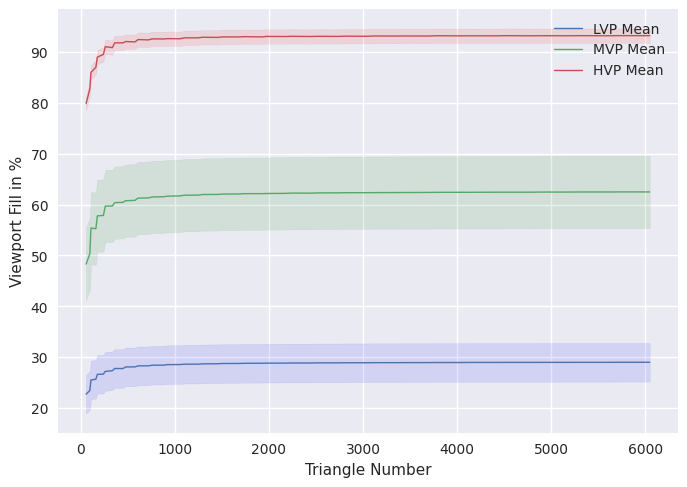

In [53]:
# Plot the mean error of each view port fill:
ax = viewport_data.plot(x ='Triangle Number', y=['LVP Mean', 'MVP Mean', 'HVP Mean'], lw=1)
plt.fill_between(viewport_data["Triangle Number"], viewport_data["LVP Mean"]-viewport_data["LVP Error"], viewport_data["LVP Mean"]+viewport_data["LVP Error"], color='blue', alpha=0.1)
plt.fill_between(viewport_data["Triangle Number"], viewport_data["MVP Mean"]-viewport_data["MVP Error"], viewport_data["MVP Mean"]+viewport_data["MVP Error"], color='green', alpha=0.1)
plt.fill_between(viewport_data["Triangle Number"], viewport_data["HVP Mean"]-viewport_data["HVP Error"], viewport_data["HVP Mean"]+viewport_data["HVP Error"], color='red', alpha=0.1)

ax.set_ylabel("Viewport Fill in %")
if saveFig:
    plt.savefig('plots/view_port_final.png')

plt.show()

### Intersection Heat Map

Here we try to visualize how many intersection checks are being done in each operation.

In [54]:
# Function which extracts the intersection data from the example
def get_intersections_as(x, y, z):
    ans = np.zeros(shape=(len(np.unique(x)),len(np.unique(y))))
    for i in range(len(x)):
        ans[y[i]][x[i]] = z[i] 
    return ans

In [55]:
# Read data of naive heat tests
heat_data_naive = pd.read_csv("time_tests/heat/heat_tests_naive.txt", header=None)
heat_data_naive.columns = ["x", "y", "n"]
heat_data_naive

,x,y,n
0,0,0,449
1,1,0,449
2,2,0,449
3,3,0,449
4,4,0,449
...,...,...,...
999995,995,999,449
999996,996,999,449
999997,997,999,449
999998,998,999,449


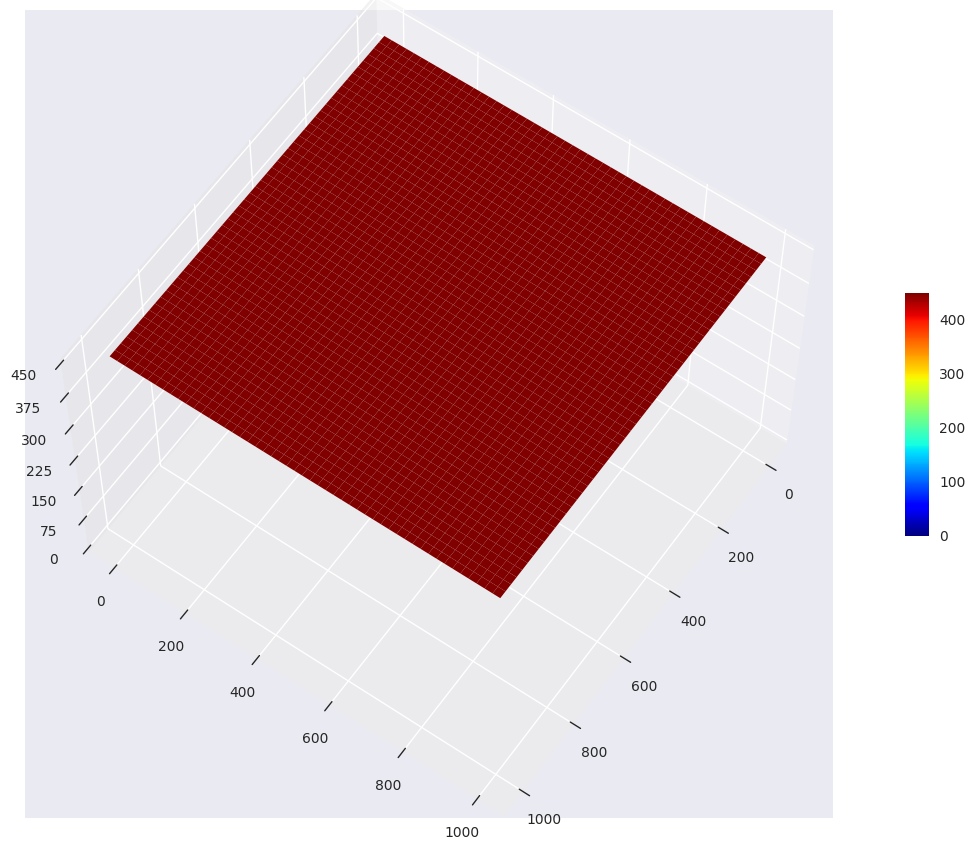

In [56]:
temp_a = heat_data_naive["x"].to_numpy()
temp_b = heat_data_naive["y"].to_numpy()
temp_c = heat_data_naive["n"].to_numpy()

x = np.unique(temp_a)
y = np.unique(temp_b)
X, Y = np.meshgrid(x, y)
Z = get_intersections_as(temp_a, temp_b, temp_c)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0.2, antialiased=True)
ax.set_zlim(0, 450)
ax.zaxis.set_major_locator(LinearLocator(7))
ax.view_init(60, 35)
surf.set_clim(0,450)
fig.colorbar(surf, shrink=0.3, aspect=10)
fig.set_size_inches(18.5, 10.5)
if saveFig:
    plt.savefig('plots/test_count_naive.png')
plt.show()  

In [57]:
# First we must read the data and extract it in an appropriate way
heat_data_bin = pd.read_csv("time_tests/heat/heat_tests_bin.txt", header=None)
heat_data_bin.columns = ["x", "y", "n"]
heat_data_bin

,x,y,n
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0
...,...,...,...
999995,995,999,0
999996,996,999,0
999997,997,999,0
999998,998,999,0


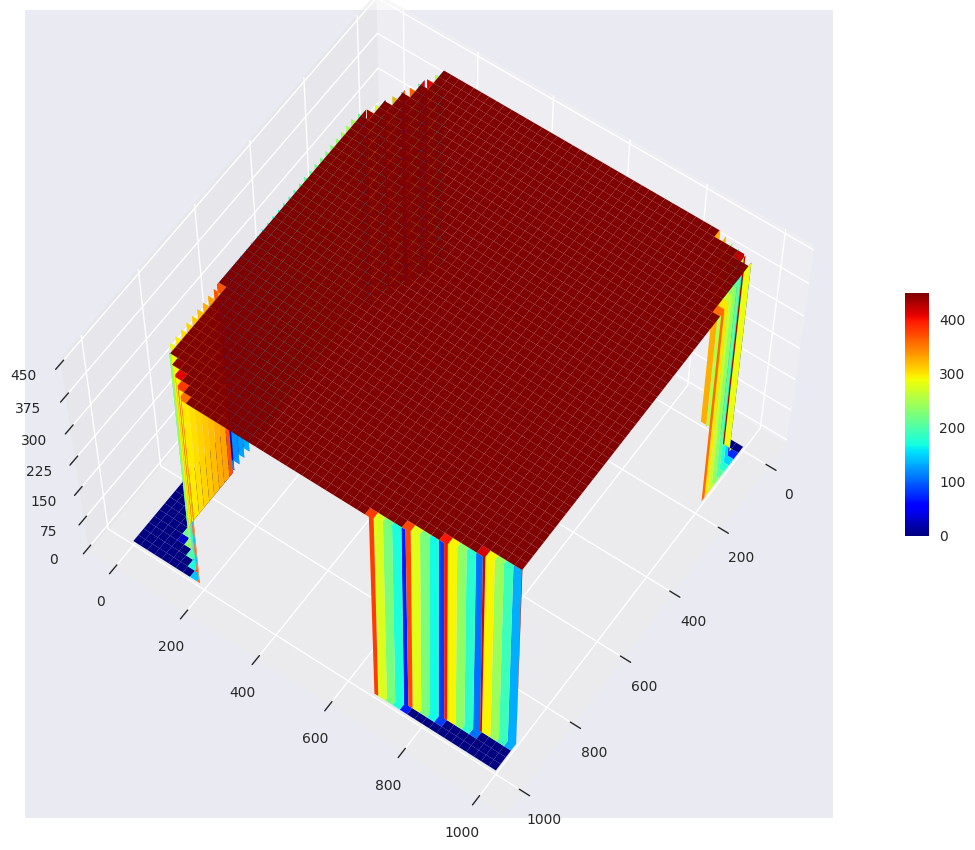

In [58]:
temp_a = heat_data_bin["x"].to_numpy()
temp_b = heat_data_bin["y"].to_numpy()
temp_c = heat_data_bin["n"].to_numpy()

x = np.unique(temp_a)
y = np.unique(temp_b)
X, Y = np.meshgrid(x, y)
Z = get_intersections_as(temp_a, temp_b, temp_c)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0.2, antialiased=True)
ax.set_zlim(0, 450)
ax.zaxis.set_major_locator(LinearLocator(7))
ax.view_init(60, 35)
surf.set_clim(0,450)
fig.colorbar(surf, shrink=0.3, aspect=10)
fig.set_size_inches(18.5, 10.5)
if saveFig:
    plt.savefig('plots/test_count_bin.png')
plt.show()  

In [59]:
# First we must read the data and extract it in an appropriate way
heat_data_optim = pd.read_csv("time_tests/heat/heat_tests_optim.txt", header=None)
heat_data_optim.columns = ["x", "y", "n"]
heat_data_optim

,x,y,n
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0
...,...,...,...
999995,995,999,0
999996,996,999,0
999997,997,999,0
999998,998,999,0


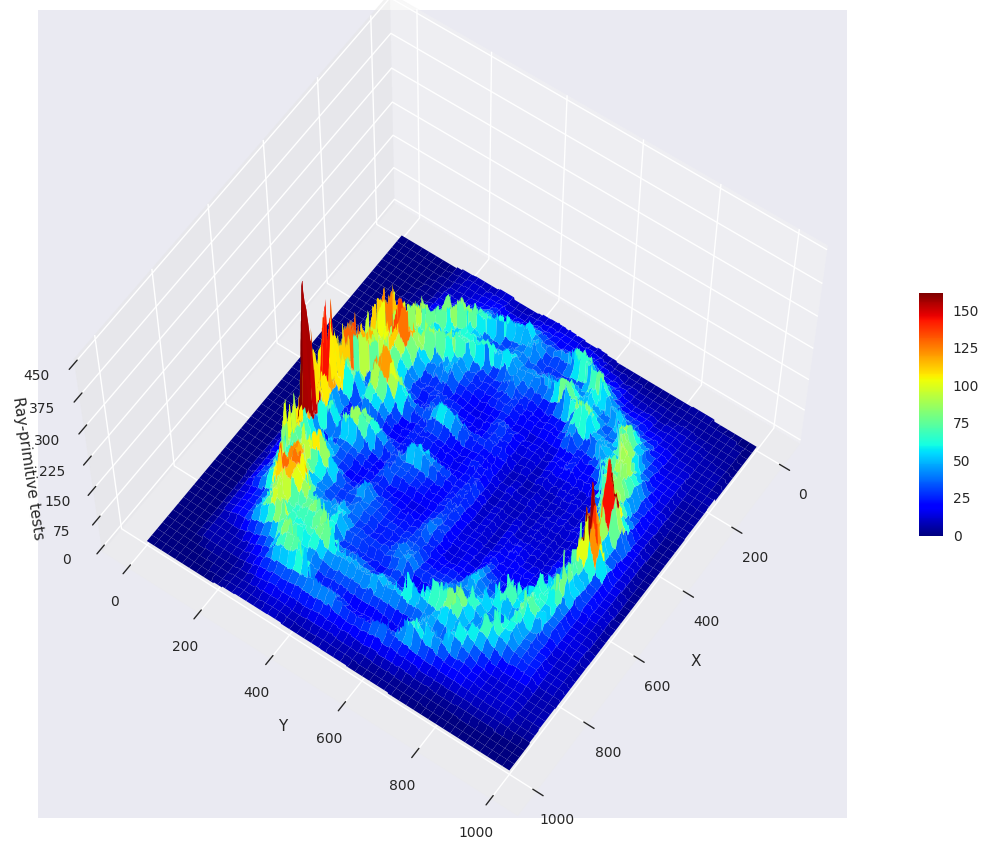

In [60]:
temp_a = heat_data_optim["x"].to_numpy()
temp_b = heat_data_optim["y"].to_numpy()
temp_c = heat_data_optim["n"].to_numpy()

x = np.unique(temp_a)
y = np.unique(temp_b)
X, Y = np.meshgrid(x, y)
Z = get_intersections_as(temp_a, temp_b, temp_c)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0.2, antialiased=True)
ax.set_zlim(0, 450)
ax.zaxis.set_major_locator(LinearLocator(7))
ax.view_init(60, 35)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Ray-primitive tests')
fig.colorbar(surf, shrink=0.3, aspect=10)
fig.set_size_inches(18.5, 10.5)
if saveFig:
    plt.savefig('plots/test_count_optim.png')
plt.show()  

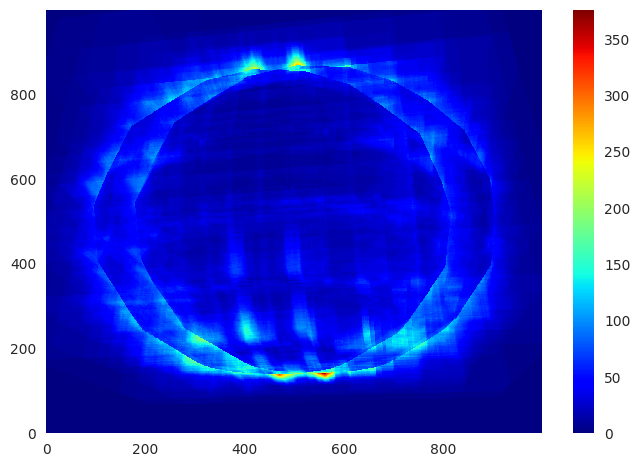

In [61]:
plt.pcolormesh(X, Y, Z, shading='auto', cmap=cm.jet)
plt.colorbar()
if saveFig:
    plt.savefig('plots/test_count_density_optim.png')
plt.show()

## Nesting Tests
Here we perform tests in order to nest more geometries together.

In [62]:
# First a function to generate our rates
def generateRates(start_idx, finish_idx):
    path = "nesting_tests/renders/"
    n_viewPort = []
    n_steps = []
    for i in range(start_idx, finish_idx, 1):
        n_viewPort.append(getRate(path + "bin_nest_union_" + str(i) + ".png"))
        n_steps.append(i)
    data_tuples = list(zip(n_steps, n_viewPort))
    main_df = pd.DataFrame(data_tuples, columns=['Index','Rate'])
    return main_df

In [63]:
nesting_tests = generateRates(1, 21)
nesting_tests["Mean Rate"] = nesting_tests["Rate"].mean()
nesting_tests["Error"] = nesting_tests["Rate"] - nesting_tests["Mean Rate"]

In [64]:
nesting_tests

,Index,Rate,Mean Rate,Error
0,1,26.106250,27.023346,-0.917096
1,2,28.895573,27.023346,1.872227
2,3,31.792665,27.023346,4.769319
3,4,30.575174,27.023346,3.551827
4,5,29.360417,27.023346,2.337070
5,6,29.003125,27.023346,1.979779
6,7,30.501128,27.023346,3.477782
7,8,29.179905,27.023346,2.156558
8,9,27.974002,27.023346,0.950655
9,10,27.434245,27.023346,0.410898


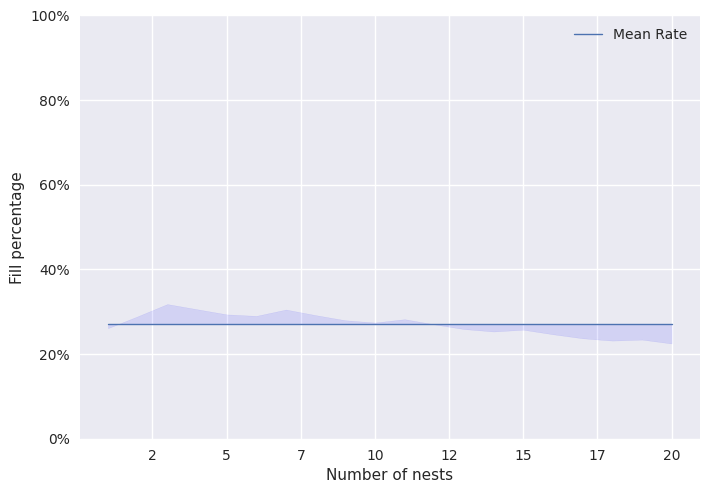

In [65]:
ax = nesting_tests.plot(x ='Index', y="Mean Rate", lw=1)
plt.fill_between(nesting_tests["Index"], nesting_tests["Mean Rate"]+nesting_tests["Error"], nesting_tests["Mean Rate"], color='blue', alpha=0.1)
plt.ylim([0, 100])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter("%d"))
ax.set_xlabel('Number of nests')
ax.set_ylabel('Fill percentage')
if saveFig:
    plt.savefig('plots/test_nesting_rates.png')

In [66]:
naive_nests = pd.read_csv('nesting_tests/time/naive_nests.txt', header=None)
naive_nests.columns = ["Triangle Number", "Step", "Naive Time"]

optim_nests = pd.read_csv('nesting_tests/time/optim_nests.txt', header=None)
optim_nests.columns = ["Triangle Number", "Step", "Optim Time"]

bin_nests = pd.read_csv('nesting_tests/time/bin_nests.txt', header=None)
bin_nests.columns = ["Triangle Number", "Step", "Bin Time"]

In [67]:
naive_nests

,Triangle Number,Step,Naive Time
0,1584,1,207141
1,2112,2,279487
2,2640,3,350991
3,3168,4,422971
4,3696,5,495506
5,4224,6,570930
6,4752,7,652891
7,5280,8,742476
8,5808,9,825728
9,6336,10,897448


In [68]:
nesting_tests["Naive Time"] = naive_nests["Naive Time"]
nesting_tests["Bin Time"] = bin_nests["Bin Time"]
nesting_tests["Optim Time"] = optim_nests["Optim Time"]

In [69]:
nesting_tests

,Index,Rate,Mean Rate,Error,Naive Time,Bin Time,Optim Time
0,1,26.106250,27.023346,-0.917096,207141,104207,4575
1,2,28.895573,27.023346,1.872227,279487,147855,5638
2,3,31.792665,27.023346,4.769319,350991,228229,6943
3,4,30.575174,27.023346,3.551827,422971,253762,7674
4,5,29.360417,27.023346,2.337070,495506,270648,8196
5,6,29.003125,27.023346,1.979779,570930,282796,8501
6,7,30.501128,27.023346,3.477782,652891,375704,9099
7,8,29.179905,27.023346,2.156558,742476,379417,9319
8,9,27.974002,27.023346,0.950655,825728,380975,9626
9,10,27.434245,27.023346,0.410898,897448,375277,9712


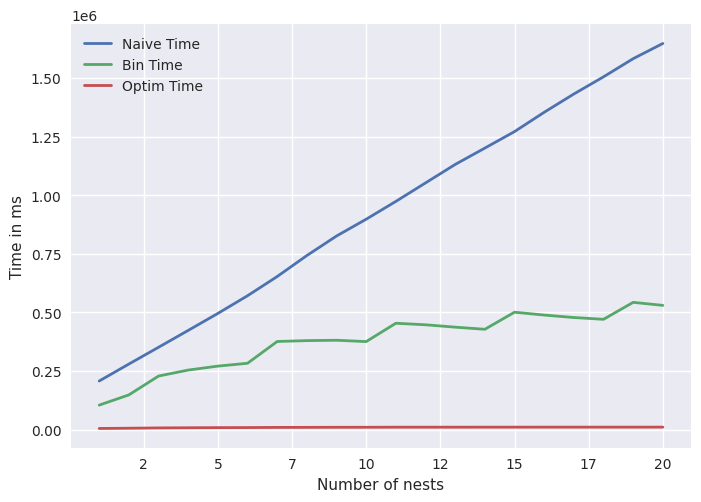

In [70]:
ax = nesting_tests.plot(x ='Index', y=["Naive Time", "Bin Time", "Optim Time"], lw=2)
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter("%d"))
ax.set_xlabel('Number of nests')
ax.set_ylabel('Time in ms')
if saveFig:
    plt.savefig('plots/test_nesting.png')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4d2adc30-53a1-4bf1-8670-5f0dd5b807d5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>